In [1]:
from typing import List

import numpy as np
from matplotlib import pyplot as plt
from termcolor import colored

from src.models.model_result import ModelResult
from src.services.result import get_model_results

In [2]:
IMAGE_SIZE = (512, 512)
MODEL_RESULTS_PATH = 'data/results.json'

In [3]:
model_results: List[ModelResult] = get_model_results(MODEL_RESULTS_PATH)
model_names = list(set([model_result['model_name'] for model_result in model_results]))
model_names.sort(key=lambda x: [model_result['model_name'] for model_result in model_results].index(x))
print(f'{colored("Model names:", "cyan")} {", ".join(model_names)}')

dataset_versions = list(set([model_result['dataset_version'] for model_result in model_results]))
dataset_versions.sort()
print(f'{colored("Dataset versions:", "cyan")} {", ".join(dataset_versions)}')

Model names: P1, P2
Dataset versions: 2023-03-22, 2023-04-02, 2023-04-03


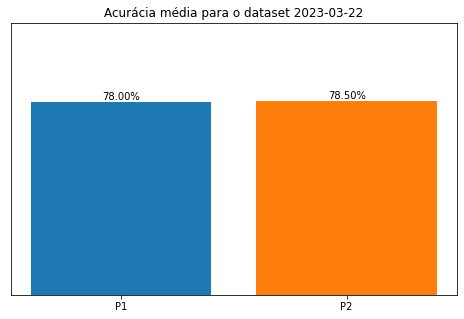

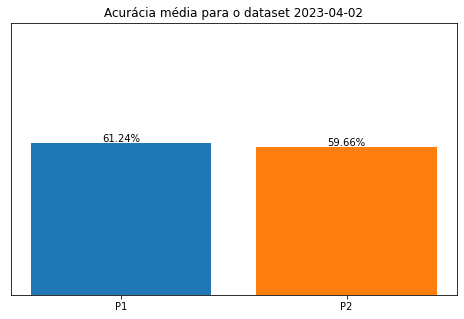

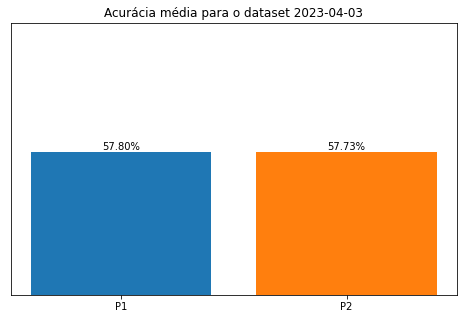

In [4]:
for dataset_version in dataset_versions:
    plt.figure(figsize=(8, 5))
    for model_name in model_names:
        accuracy_list = [m['accuracy'] for m in model_results if m['model_name'] == model_name and m['dataset_version'] == dataset_version]
        if len(accuracy_list) == 0:
            continue
        mean = np.mean(accuracy_list)
        plt.title(f'Acurácia média para o dataset {dataset_version}')
        plt.bar(model_name, mean)
        plt.text(model_name, mean, f'{mean:.2%}', ha='center', va='bottom')
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.ylim(0, 1.1)
    plt.show()

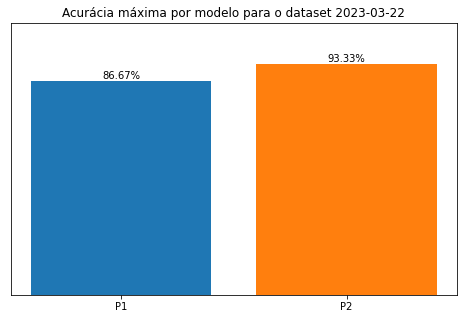

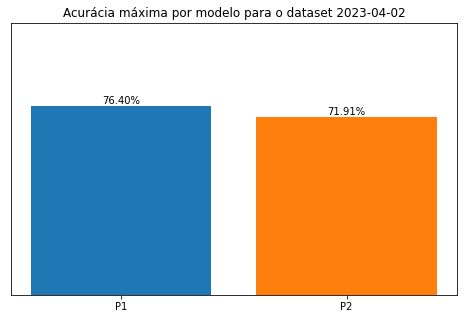

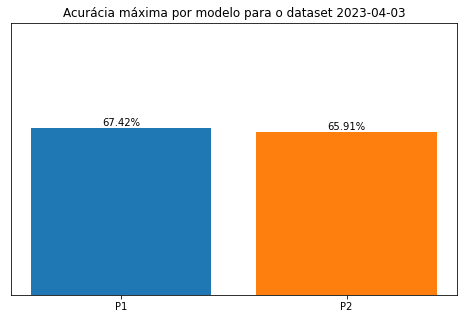

In [5]:
for dataset_version in dataset_versions:
    plt.figure(figsize=(8, 5))
    for model_name in model_names:
        accuracy_list = [m['accuracy'] for m in model_results if m['model_name'] == model_name and m['dataset_version'] == dataset_version]
        if len(accuracy_list) == 0:
            continue
        max_accuracy = np.max(accuracy_list)
        plt.title(f'Acurácia máxima por modelo para o dataset {dataset_version}')
        plt.bar(model_name, max_accuracy)
        plt.text(model_name, max_accuracy, f'{max_accuracy:.2%}', ha='center', va='bottom')
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.ylim(0, 1.1)
    plt.show()

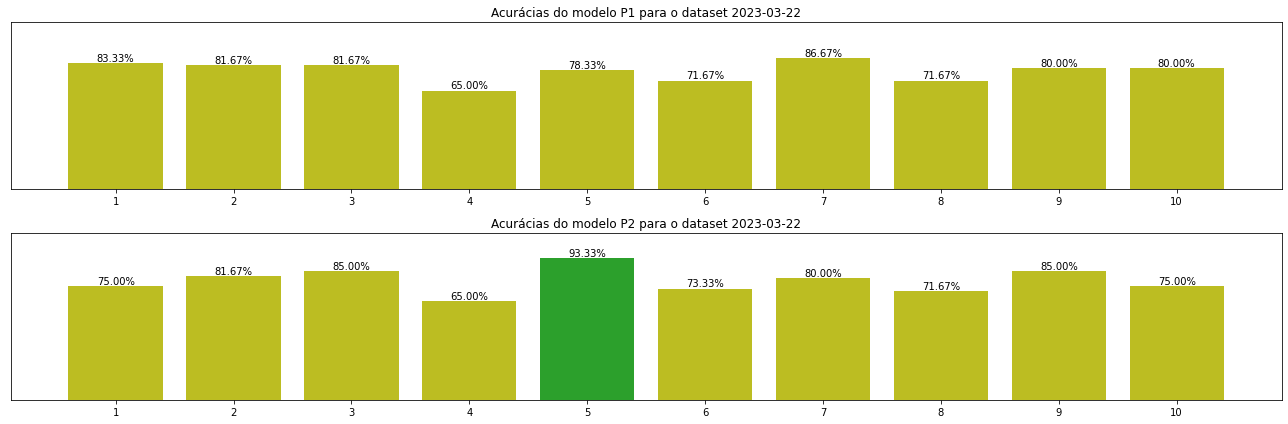

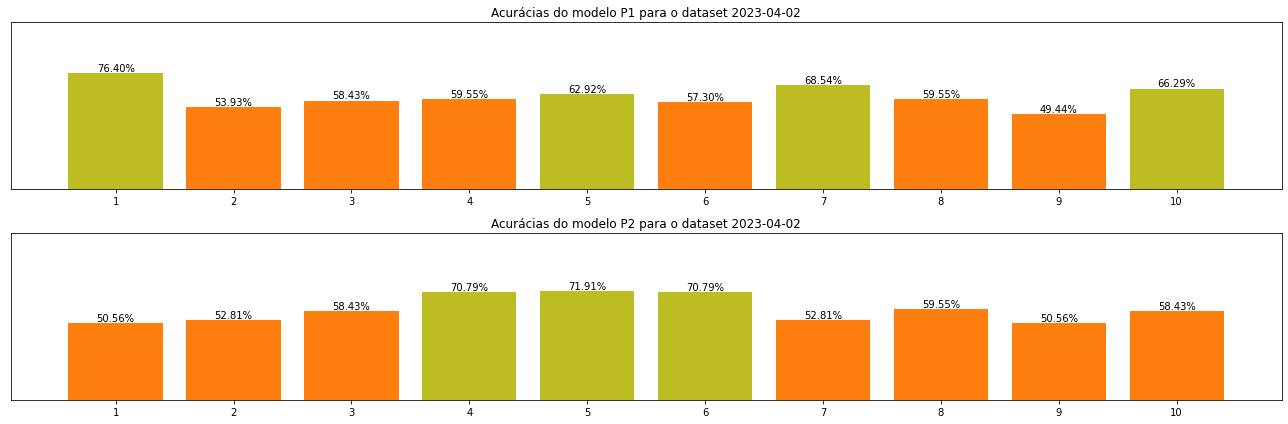

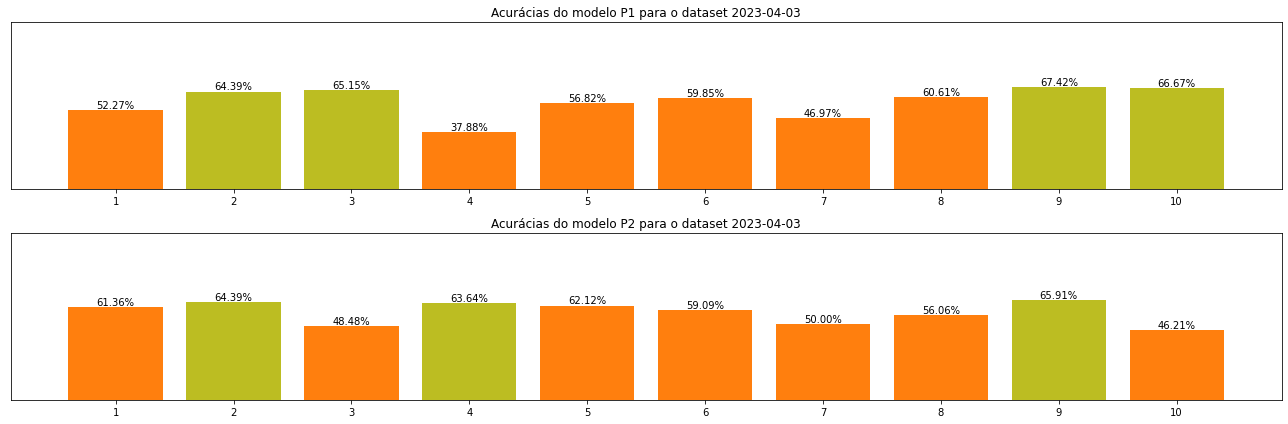

In [6]:
def get_accuracy_color(accuracy: float) -> str:
    colors = [
        '#d62728',
        '#d62728',
        '#d62728',

        '#ff7f0e',
        '#ff7f0e',

        '#bcbd22',
        '#bcbd22',

        '#2ca02c',
    ]
    linspace = np.linspace(0, 1, len(colors) + 1)
    index = np.where(accuracy > linspace)[0][-1]
    return colors[index]


for dataset_version in dataset_versions:
    fig, axs = plt.subplots(len(model_names), 1, figsize=(18, 3 * len(model_names)))
    for i, model_name in enumerate(model_names):
        accuracy_list = [m['accuracy'] for m in model_results if m['model_name']
                         == model_name and m['dataset_version'] == dataset_version]
        if len(accuracy_list) == 0:
            continue
        axs[i].set_title(f'Acurácias do modelo {model_name} para o dataset {dataset_version}')
        axs[i].set_xticks(range(len(accuracy_list)))
        for j, accuracy in enumerate(accuracy_list):
            axs[i].bar(f'{j + 1}', accuracy, color=get_accuracy_color(accuracy))
            axs[i].text(j, accuracy, f'{accuracy:.2%}', ha='center', va='bottom')
        axs[i].set_yticks([])
        axs[i].set_ylim(0, 1.1)
    plt.tight_layout()
    plt.show()
